## Project Report


##IMPORTANT


1.   It's assumed that the data is collected randomly and hence the data values are
independant.

2.   The final research question (5) is of paramount importance and is the most significant finding of the report.





***Predicting the Silent Killer: A Deep Dive into Heart Attack Analysis***

Heart disease is the leading cause of death for both men and women globally. Every year, millions of people lose their lives to this silent killer. Early detection and intervention are crucial in preventing heart attacks and their devastating consequences.

For my project, I'm diving deep into a heart attack analysis and prediction dataset from Kaggle. This dataset is a treasure trove of information, containing a wealth of attributes about patients, including their age, sex, chest pain type, blood pressure, cholesterol levels, and more. By leveraging this data, I aim  accurately assess the inticracies related to the heart performance and diseases.

Imagine a world where we can identify people at high risk of heart attack before they even experience symptoms. This would be a game-changer, allowing for early intervention and preventive measures. With this project, I hope to contribute to this critical field and empower individuals to take charge of their heart health.

This is just the beginning of my exploration. In the following sections, I'll be delving into the details of the dataset. Stay tuned to see how this project unfolds!

Throughout the project we'll use alpha = 0.05 unless stated otherwise.

In [ ]:
df = read.csv("heart.csv")


In [ ]:
head(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


cp = Chest pain type: Categorical variable describing the type of chest pain experienced (e.g., typical angina, atypical angina, non-anginal pain, asymptomatic).

trtbps = Resting blood pressure: Systolic and diastolic blood pressure readings during admission.

chol = cholestrol in mg/dl

fbs = Fasting blood sugar: Indication of whether fasting blood sugar is above a certain threshold (e.g., 120 mg/dL), typically coded as 1 (high) or 0 (normal).

restecg = Resting electrocardiographic results: Categorical variable indicating the results of an electrocardiogram (ECG) at rest (e.g., normal, ST-T wave abnormality, left ventricular hypertrophy).

thalachh = Maximum heart rate achieved: Highest heart rate reached during an exercise stress test

exng = Exercise induced angina: Indication of chest pain experienced during exercise (Yes/No or 1/0).

oldpeak = refers to the ST depression induced by exercise relative to rest.

slp = Slope of the peak exercise ST segment.

caa: Number of major vessels (0-3) colored by fluoroscopy. This indicates the number of major coronary arteries with significant narrowing.

thal: Thalassemia (a type of blood disorder) results (3 = normal, 6 = fixed defect, 7 = reversible defect).

output: Presence or absence of heart disease. This is the target variable

##Summary stats

In [ ]:
print("summary stats for age: ")
print(summary(df$age))


print("summary stats for trtbps: ")
print(summary(df$trtbps))

print("summary stats for chol: ")
print(summary(df$chol))


print("summary stats for thalachh: ")
print(summary(df$thalachh))


print("summary stats for oldpeak: ")
print(summary(df$oldpeak))


[1] "summary stats for age: "
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   47.50   55.00   54.37   61.00   77.00 
[1] "summary stats for trtbps: "
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   120.0   130.0   131.6   140.0   200.0 
[1] "summary stats for chol: "
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  126.0   211.0   240.0   246.3   274.5   564.0 
[1] "summary stats for thalachh: "
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   71.0   133.5   153.0   149.6   166.0   202.0 
[1] "summary stats for oldpeak: "
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.80    1.04    1.60    6.20 


**Data exploration**

The code below plots the boxplot between sex and Serum Cholestrol levels. On analyzing the graph, it seems as though the cholestrol level in the sample for females might be slightly higher. But this probably isn't enough to state that the trend can be extrapulated to the general population, especially because the median serum cholestrol levels for men and woman is barely different with a huge variability within the sexes themselves.

We'll look into the further in section 1 and section 5 of part2

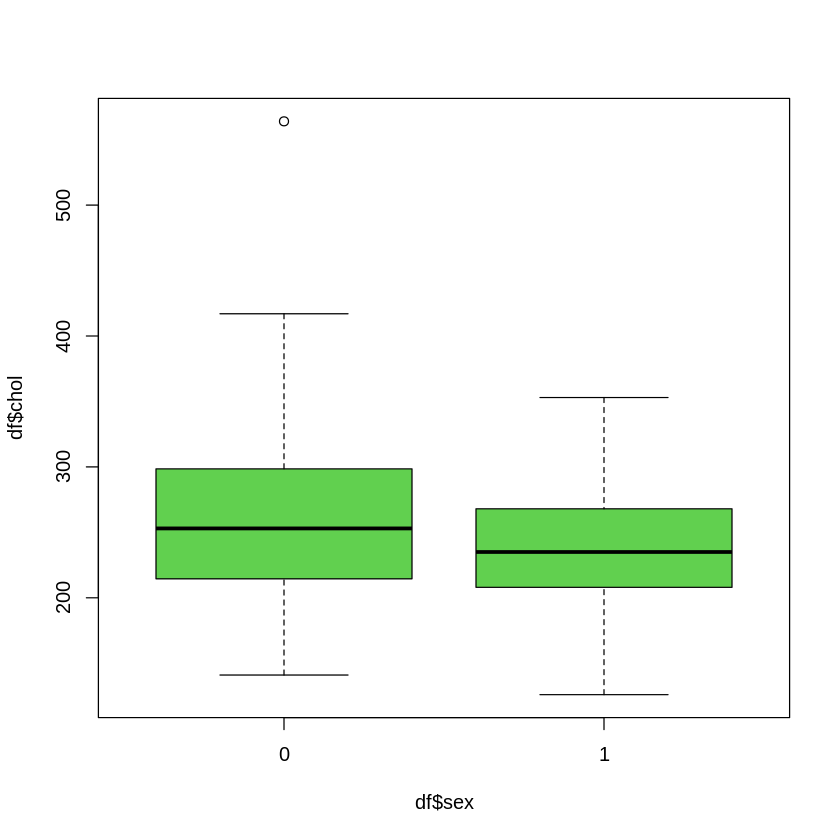

In [ ]:
boxplot(df$chol~df$sex, col = 3)
#male = 1
#female = 0

It's common knowledge that as we age our hearts become weaker and need to work harder for the same task. I plotted the graph between thalachh which is the max heart rate achieved during exercise and age. It shows an expected negative correlation. But hihg variability is clear. Maybe the decline in heart health as a consequence of ageing is controllable.

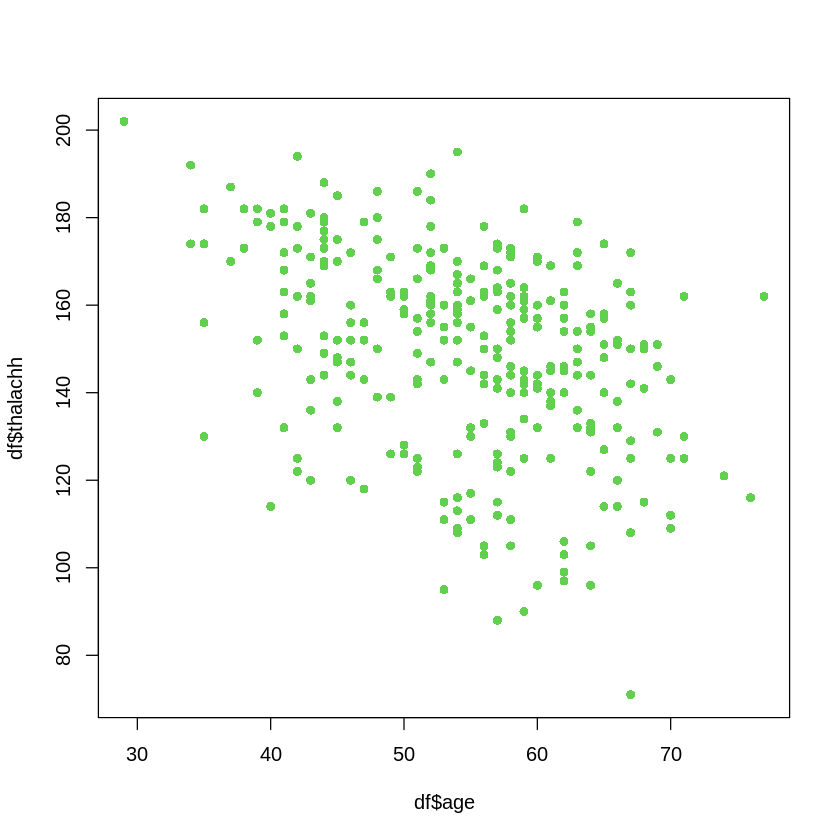

In [ ]:
plot(df$thalachh~df$age, col = 3, pch = 16)

There seems to be a correlation here.

plottign thalachh and age to gauge a relation. Since older individuals tend to have higher rates of heart disease. Maybe the negative correlation between thallachh and age could be attributed to higher heart disease rates.

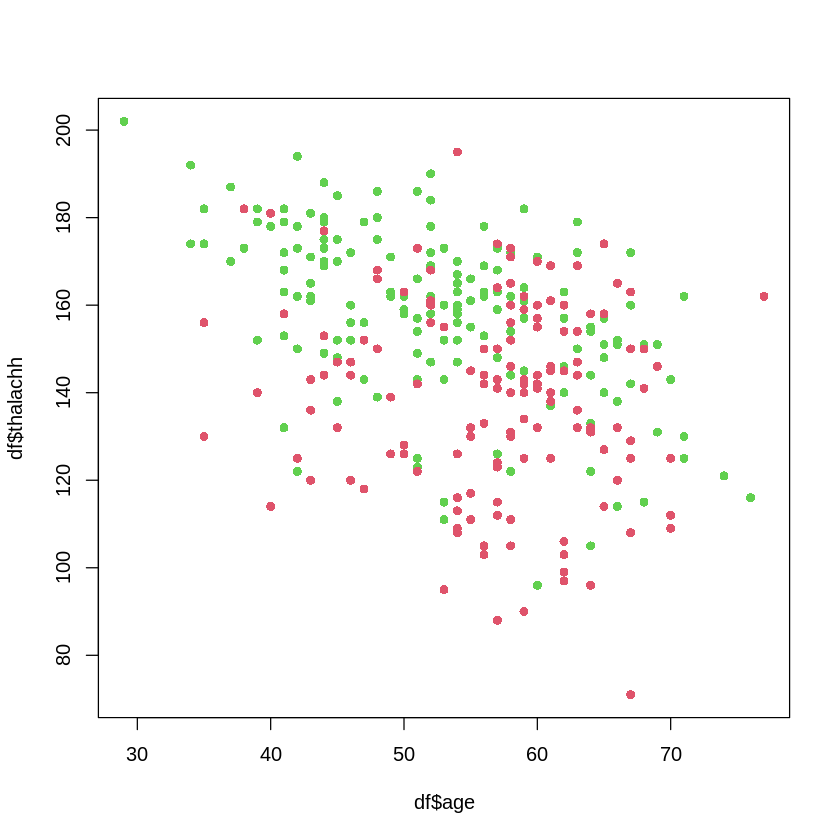

In [ ]:
plot(df$thalachh~df$age, col = df$output+2, pch = 16)

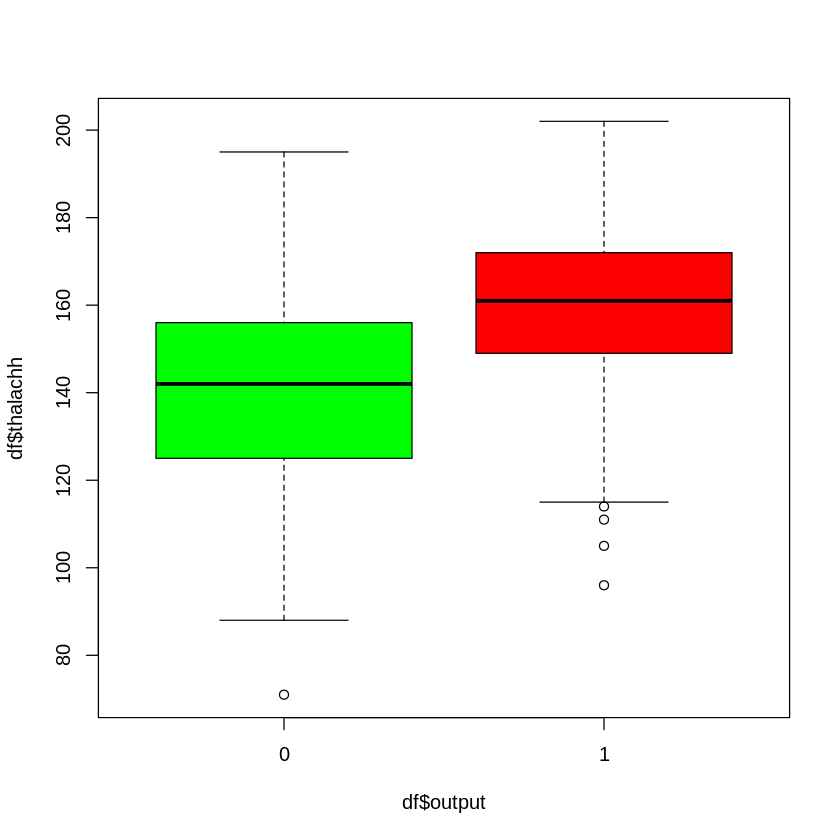

In [ ]:
boxplot(df$thalachh~df$output, col =c("green", "red"))
#1 = has heart disease
#0 = doesn't have heart disease

It looks like the above graph does attest that heart disease leads to a higher value on the thalachh. But we need to prove that there is a difference in the max heart rate achieved for people with heart disease is more than people without.

we'll work on the test for this in the next part

----------------------------------

Now we'll be plotting the relation plots to gauge a relation between heart disease and the trtbps (resting blood pressure)

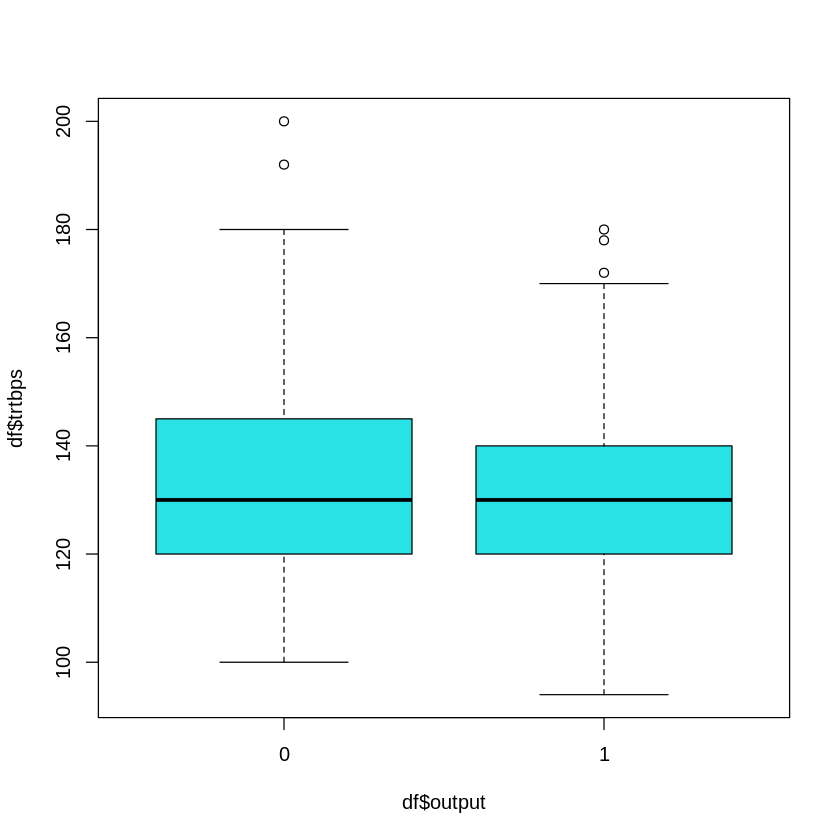

In [ ]:
boxplot(df$trtbps~df$output, col = df$output*2 + 3)

There seems to be no interestign relation between the occurence of heart disease and the resting blood pressure.

This doesn't seem interesting to explore further.

----------------------------------

we'll now plot a graph between max heart rate achieved during exercise (thalachh) and the restign blood pressure (trtbps).



I've also coloured the dots based on wether the person has a heart disease to also assess any possible role of heart disease.

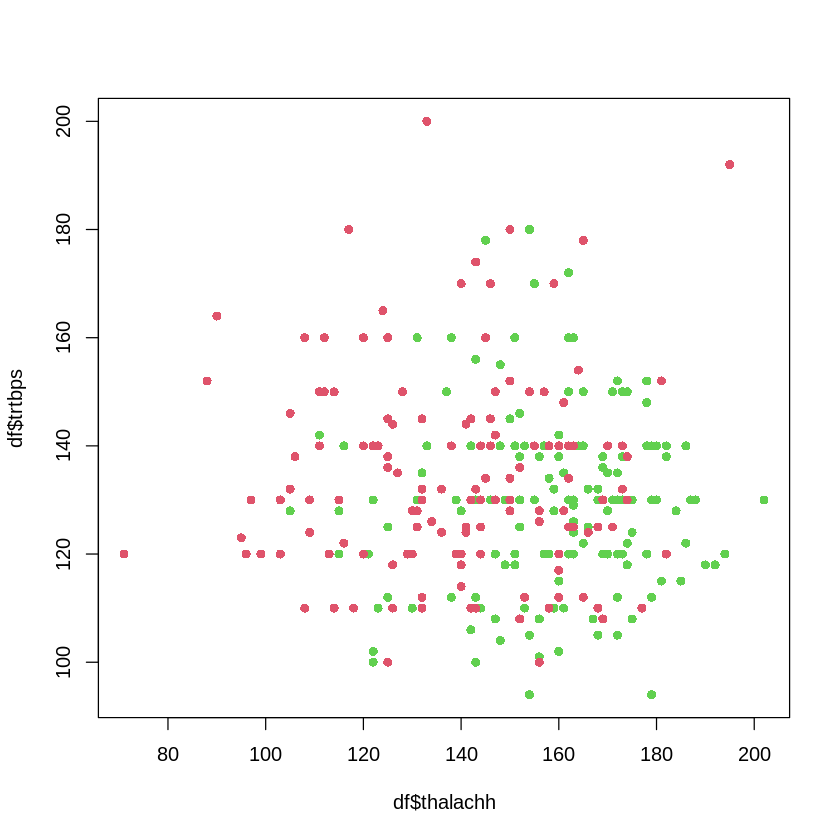

In [ ]:
plot(df$thalachh, df$trtbps, col = df$output + 2, pch = 16)
#green = has a heart disease
#red = doesn't have a heart disease

There seems to be a negative correlation, but the variation is a bit too high. There's probably not a statistically significant relation between thalachh and trtbps.

In [ ]:
cor(df$thalachh, df$trtbps)

[1] -0.04669773

In [ ]:
cor.test(df$thalachh, df$trtbps)


	Pearson's product-moment correlation

data:  df$thalachh and df$trtbps
t = -0.81106, df = 301, p-value = 0.418
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.15854155  0.06632933
sample estimates:
        cor 
-0.04669773 


The correlation test makes it certain that there's no significant relation between the population thalachh and trtbps.


----------------------------------


plotting to see if theres a relation between fasting blood sugar and cholestrol

1 = high
0 = normal

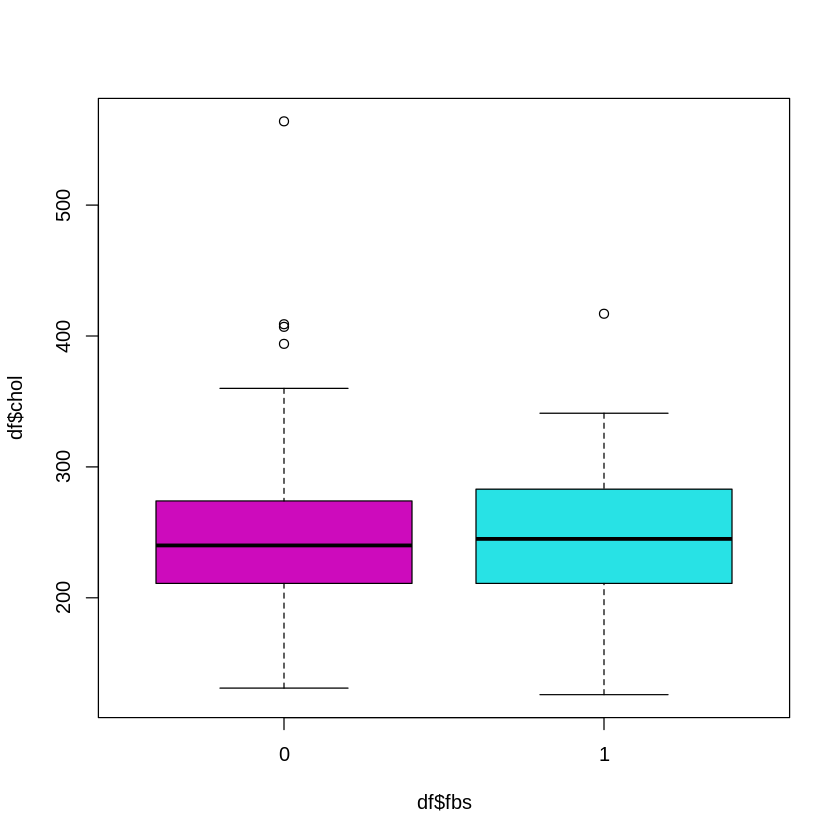

In [ ]:
boxplot(df$chol~df$fbs, col = 5 + df$fbs)

No interesting relation is visible. But there's a lot of evidence that suggests that high blood sugar leads to higher risk of heart disease. So it might be the case that high rates of fasting blood sugar leads to higher rates of heart disease without affecting the cholestrol level.

I'll be looking into the relation between fasting blood sugar and rate of heart disease.

----------------------------------

For the final data exploration subject we'll plor the graph betwee cholestrol and age to see if there's a relation between the 2.

Through ordinary social experiences there's a very conspicuous relation between age and serum cholestrol levels.



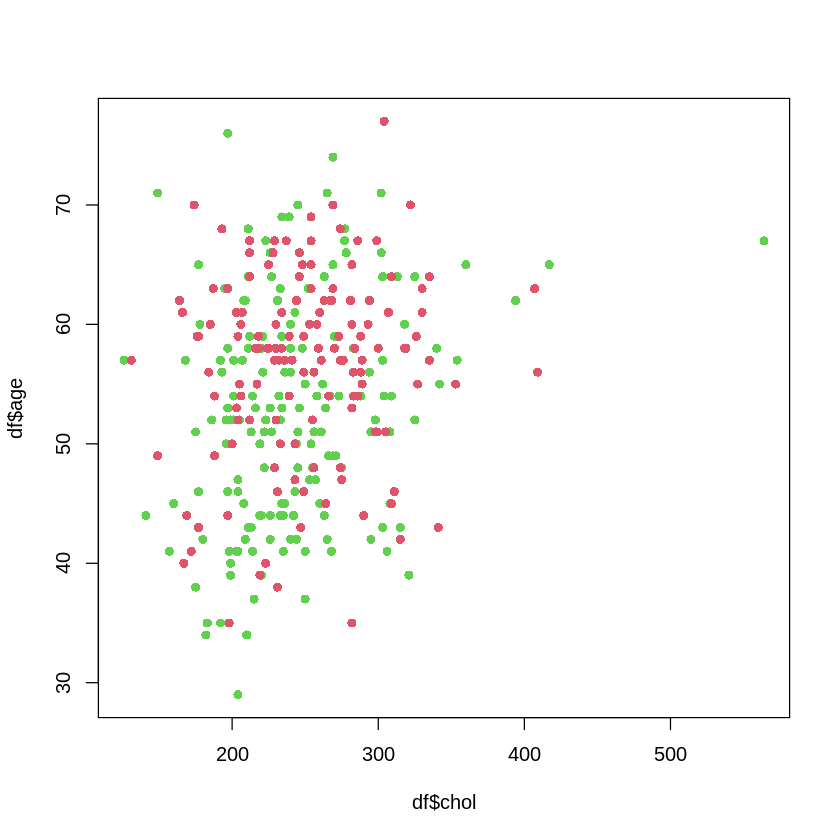

In [ ]:
plot(df$chol, df$age, col = df$output + 2, pch = 16)
#green = has heart disease
#red = doesn't have heart disease

It looks as though there's a signfificant positive correlation between age and cholestrol.

We'll look into this in the part2.

##part 2


**1.**

From the data exploration earlier it seems as though cholestrol(Serum cholestrol level) for woman might be slightly higher than men. The research paper backing that up is:
Tharu BP, Tsokos CP. A Statistical Study of Serum Cholesterol Level by Gender and Race. J Res Health Sci. 2017; 17(3): e00386.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7189954/

In [ ]:
print(length(df$chol[df$sex == 1]))
print(length(df$chol[df$sex == 0]))

[1] 207
[1] 96


We'll be using the t-test since we want to compare the means for the 2 groups.

Since both the samples are greater than 30. The sample size is big enough for the central limit theorem to kick in.

Hence the means follow a normal distribution and we can use a t-test.

To test this we will be doing an unpaired t-test.

H_0 = The mean Serum Cholestrol Level(SCL) for males and females is the same.

H_1 = The mean SCL for males is less than for females.

We'll take alpha = 0.95.

1 = male

0 = female

In [ ]:
t.test(df$chol[df$sex == 1], df$chol[df$sex == 0], paired = FALSE, alternative = "less")


	Welch Two Sample t-test

data:  df$chol[df$sex == 1] and df$chol[df$sex == 0]
t = -3.0244, df = 134.39, p-value = 0.001493
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -9.957452
sample estimates:
mean of x mean of y 
 239.2899  261.3021 


There's a 0.1493% chance that we get a value as extreme as we have if the mean Serum Cholestrol Levels of the 2 groups were the same. So it's highly unlikely that men and women have the same average Serum Cholestrol Level.

Since the p_value < 0.05. We reject the null hypothesis.

 We've verified that according to the sample data that we have it looks as though woman, in general, have a higher Serum Cholestrol Level than men. So the cited research paper has been verified through our data.

While cholesterol is just one piece of the puzzle, it's important for women to be aware that they may have a slightly higher risk of hight SCL.

The good news is there's a lot you can do to take charge of your heart health! Here are some key steps:

**Know your numbers**: Get regular checkups to monitor your cholesterol levels along with other heart health markers like blood pressure.

**Embrace a heart-healthy lifestyle**: Focus on a balanced diet rich in fruits, vegetables, and whole grains while limiting unhealthy fats. Regular exercise is also crucial.

**Talk to your doctor**: Discuss your individual risk factors and create a personalized plan to keep your heart healthy. Don't hesitate to ask questions and express any concerns you may have.

----------------------------------

**2.**

There's copius amount of evidence that point towards a correlation between fasting blood sugar levels and heart disease. Studies have shown that chronically elevated fasting glucose, even in individuals not yet diagnosed with diabetes, increases the risk of cardiovascular events like heart attack and stroke.

"The effect of change in fasting glucose on the risk of myocardial infarction, stroke, and all-cause mortality: a nationwide cohort study"

(https://pubmed.ncbi.nlm.nih.gov/29626936/)

Throught the following analysis I intend to provide evidence to support or reject the conclusion of the aforementioned study.

We'll be using an independant sample t-test for categorical variables, since we want to see if the proportion of people with high blood sugar levels tend to have higher rates of heart disease. For our case if both people with normal blood sugar and high blood sugar have the same risk/rate of heart disease, there should be an even split and the proportion of people with high blood pressure who have a heart disease should be the same as the people with normal blood pressure who have a heart disease.

This proportion should be around 0.5.

H_0 = fasting blood sugar doesn't affect the rate of heart disease.

H_1 = fasting blood sugar does affect the rate of heart disease.

In [ ]:
#we're going to calculate the proportion of people who don't have a
#heart disease but have high blood sugar.
not_high_blood_sugar_with_disease = sum(df$fbs[df$output == 0])
#calculating the total number of people with high blood sugar
fbs_1 = sum(df$fbs)
#proportion of people with high_sugar who have a heart disease
prop = not_high_blood_sugar_with_disease/fbs_1
print(prop)

[1] 0.4888889


In [ ]:
# Number of people with high blood sugar with heart disease
high_blood_sugar_with_disease = sum(df$fbs[df$output == 1])
fbs_1 = sum(df$fbs)
# Number of people with hear disease
num_disease = sum(df$output[df$fbs == 1] == 1)
# Ration of people with high blood sugar with heart disease and total number
# of people with heart disease. If there's no correlation, the ratio should be
# around 0.5
prop_1 = high_blood_sugar_with_disease/fbs_1
prop.test(high_blood_sugar_with_disease, fbs_1)


	1-sample proportions test with continuity correction

data:  high_blood_sugar_with_disease out of fbs_1, null probability 0.5
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3597755 0.6605712
sample estimates:
        p 
0.5111111 


The p-value is very high, hence we fail to reject the null hypothesis. Maybe the correlation between the fbs and rate of hear disease isn't very strong. The analysis of the data we have shows that if we assume that fasting blood sugard doesn't affect the rate of hear disease, the probability of getting an observation as extreme as we just did is very high. This makes it highly unlikely that there's a relation between the rate of heart disease and the fasting blood sugar.

There might be other physiological affects of diabetes that might cause the increased risk of heart disease, and further investigation needs to be done to identify those reasons or refute the conclusion of the study cited.

In [ ]:
print(num_disease)

[1] 165


Since the sample size here is > 30. We can assume a fairly normal distribution. This proves that our assumptions for a t-test are satisfied.

----------------------------------

**3.**

earlier we had noticed a relation between thalachh and rate of hear disease. We had noticed that people with heart disease tend to have a higher maximum heart rate achieved during exercise.

In the following code segment we work to prove/disprove this claim.

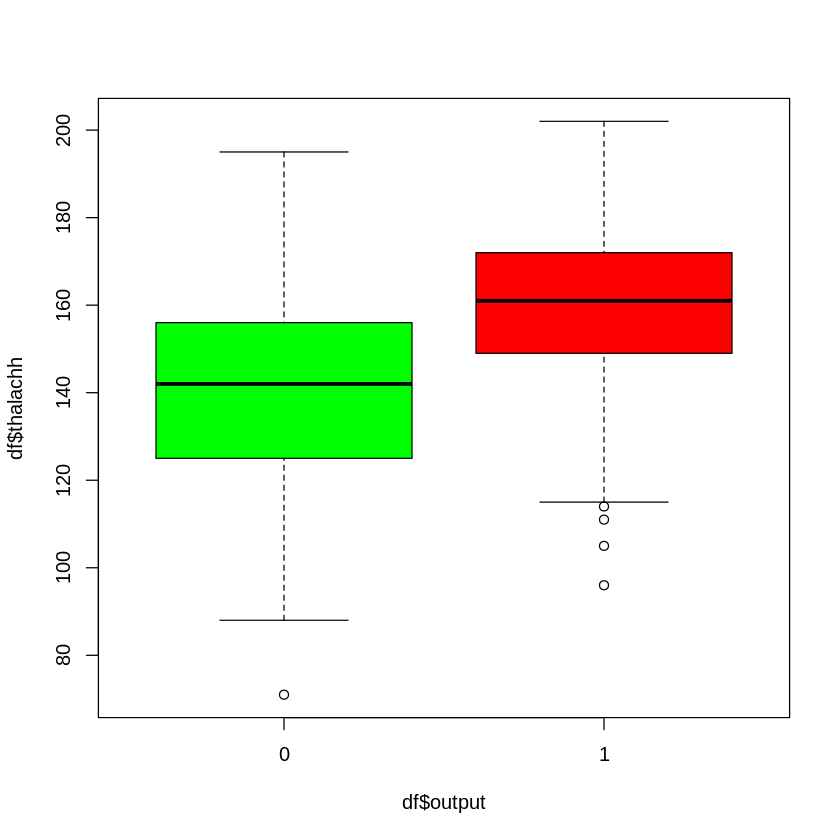

In [ ]:
boxplot(df$thalachh~df$output, col =c("green", "red"))
#1 = has heart disease
#0 = doesn't have heart disease

We'll be using a simple linear regression model to gauge the statistical significance of the relation between heart disease and the maximum heart rate achieved during exercise.

The validity of the assumption made for using the linear model is demonstrated after using the model.

The linear model will do multiple t-tests and ANOVA to check for the statistical significance of the variables.

H_0: presence of heart disease doesn't affect thlachh

H_1: presence of heart disease does affect thlachh

In [ ]:
model = lm(df$thalachh~as.factor(df$output))

In [ ]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.factor(df$output),1,28181.57,28181.5681,65.1201,1.697338e-14
Residuals,301,130261.65,432.7629,NA,NA


In [ ]:
summary(model)


Call:
lm(formula = df$thalachh ~ as.factor(df$output))

Residuals:
    Min      1Q  Median      3Q     Max 
-68.101 -12.784   2.899  14.533  55.899 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            139.101      1.771   78.55  < 2e-16 ***
as.factor(df$output)1   19.365      2.400    8.07  1.7e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.8 on 301 degrees of freedom
Multiple R-squared:  0.1779,	Adjusted R-squared:  0.1751 
F-statistic: 65.12 on 1 and 301 DF,  p-value: 1.697e-14


The analysis yielded a very small p-value (p = 1.697338e-14). In statistics, a p-value this low indicates strong evidence to reject the null hypothesis (H_0). In this case, H_0 stated that the presence of heart disease does not affect thlachh (presumably a heart health measure).

Rejecting the null hypothesis suggests we can embrace the alternative hypothesis (H_1). Therefore, our findings provide statistical evidence that the presence of heart disease has an impact on thlachh levels.

There seems to be a statistically significant correlation between the maximum hear rate achieved during exercise and the rate of heart disease.

In fact heart disease can account for 18% of the variability in maximum heart rate achieved during exercise.

For individuals with heart disease, avoiding overexertion is crucial. The heart, already compromised by the disease, struggles to pump blood efficiently. During strenuous activity, the body demands more oxygen, requiring the heart to work harder and pump faster to deliver it. This increased heart rate can put a significant strain on the weakened heart muscle, potentially leading to chest pain, shortness of breath, or even more serious complications. By listening to their bodies and avoiding excessive exertion, people with heart disease can help manage their condition and reduce the risk of further complications.

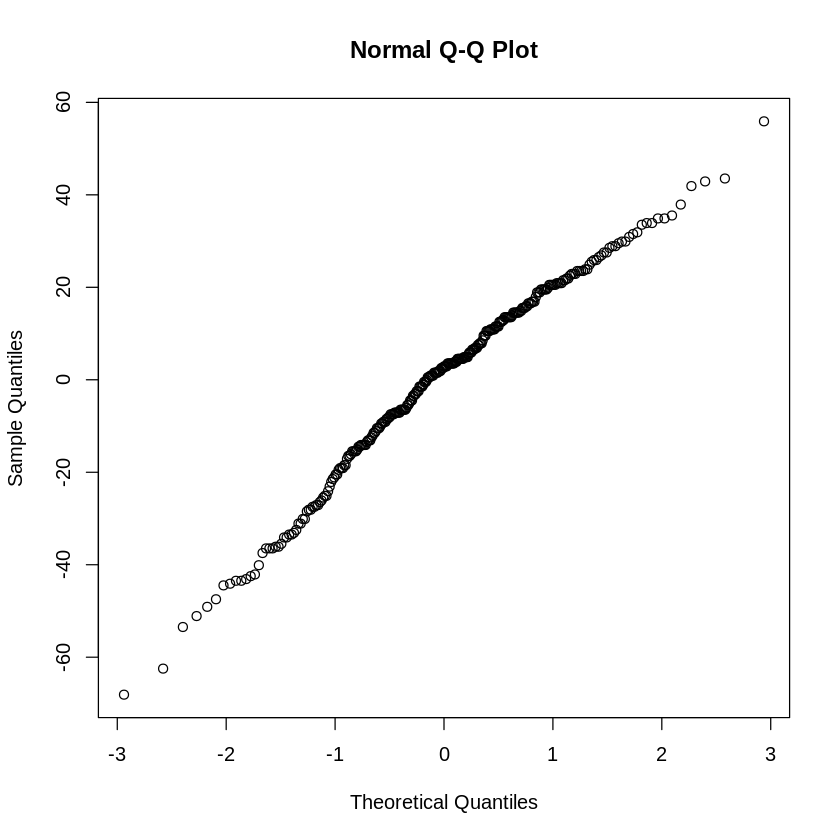

In [ ]:
qqnorm(model$residuals)       # looks fairly straight so can be considered normal.

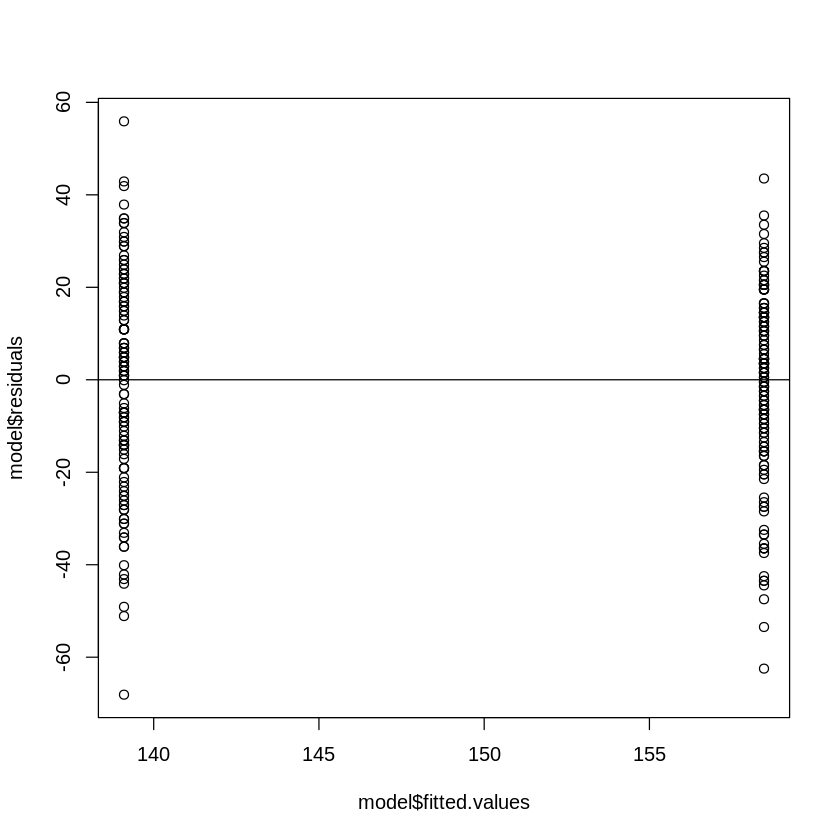

In [ ]:
plot(model$fitted.values, model$residuals)
abline(h = 0)

The standard deviation of the residuals looks similar in both the groups.

Hence using the linear model is justified.

----------------------------------

**4**

Earlier we had noticed a possible positive correlation between age and serum cholestrol levels. The code segment below tests our claim

Many healthcare professionals observe a rise in cholesterol levels among their patients as they age. This anecdotal evidence suggests a potential correlation between age and cholesterol. However, the strength and nature of this relationship remain unclear. A statistical analysis can help us quantify this association and determine if there's a statistically significant trend between age and cholesterol levels in a larger population. Understanding this relationship can be valuable for developing targeted preventive measures and early interventions for high cholesterol, a major risk factor for heart disease.

We'll be using a simple linear regression model to gauge the statistical significance of the relation between heart disease and the maximum heart rate achieved during exercise.

This test will do the ANOVA analysis and help us in making our decisions

H_0: There's no significant correlation between Serum cholestrol levels and age.

H_1: There's a significant correlation between Serum cholestrol levels and age.

In [ ]:
cor(df$chol, df$age)

[1] 0.213678

There seems to be a positive correlation.

In [ ]:
linear_model = lm(df$chol~df$age)

In [ ]:
summary(linear_model)


Call:
lm(formula = df$chol ~ df$age)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.476  -32.560   -5.745   28.024  302.330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 179.9675    17.7116  10.161  < 2e-16 ***
df$age        1.2194     0.3213   3.795 0.000179 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.72 on 301 degrees of freedom
Multiple R-squared:  0.04566,	Adjusted R-squared:  0.04249 
F-statistic:  14.4 on 1 and 301 DF,  p-value: 0.0001786


The F-statistic is 14.4 which corresponds to the p-value of 0.0001786. This means that the probability of getting the observation as extreme as the ones we did, under the assumption that there's no relation between age and cholestrol, is 0.0001786.

This means that we reject the null hypothesis

There's a weak but significant relation between cholestrol and age in the population too. There's probably some others factors affecting cholestrol since only 4.5% of the variation of the cholestrol is due to age.

Testing the assumptions of the linear model

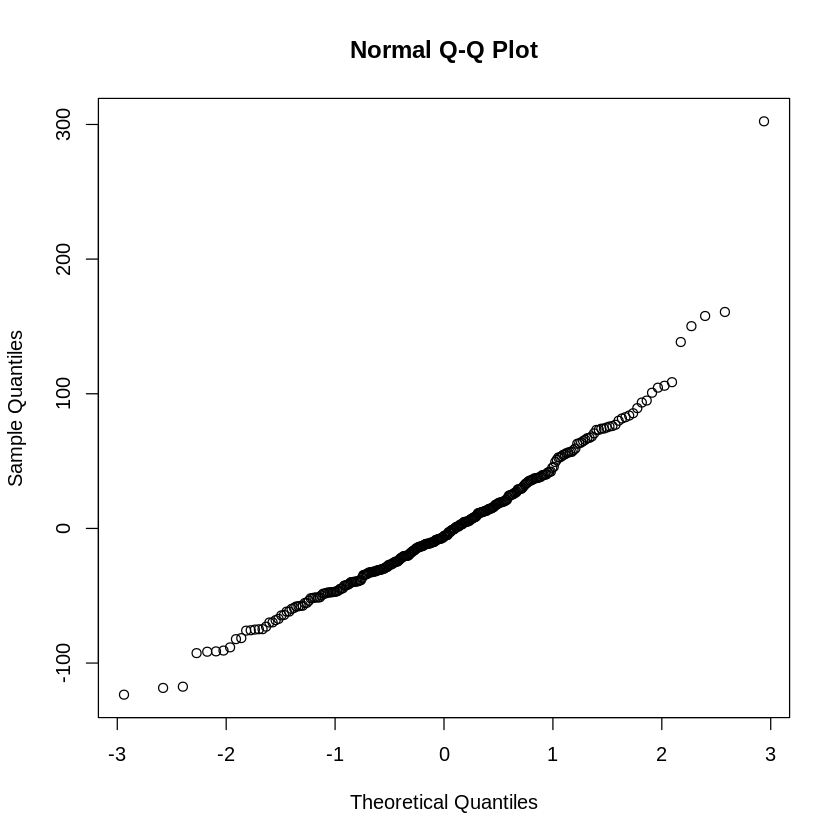

In [ ]:
qqnorm(linear_model$residuals)
# There's a slight deviation but the plot is straight enough
# to be considered a normal distribution

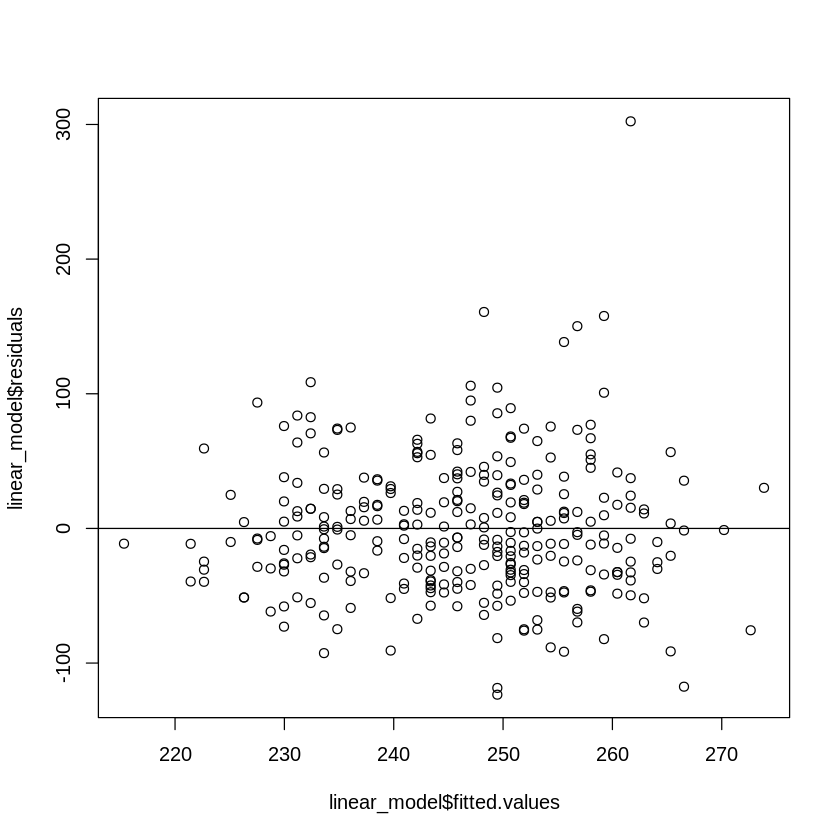

In [ ]:
plot(linear_model$fitted.values, linear_model$residuals)
abline(h = 0)

Apart from a few outliers the standard deviation of the residuals looks pretty constant.

Hence we can use the linear model.

----------------------------------

**5**

Earlier we had shown that woman tend to have higher mean Serum Cholestrol levels than men on average. But this might not necessarily be the case for all age groups.

The articles and research papers below point out the increased risk of cardiovascular disease as a result of increase Serum Cholestrol Level (primarily due to inceases in SCL). among woman after menopause. Our dataset could be used to provide evidence to refute or back up the claims of the article and its cited sources.

https://www.hopkinsmedicine.org/health/conditions-and-diseases/menopause-and-the-cardiovascular-system

https://time.com/6215450/how-menopause-affects-cholesterol/

https://pubmed.ncbi.nlm.nih.gov/2124647/#:~:text=Serum%20triglycerides%20and%20HDL%2Dcholesterol,observed%20in%20post%2Dmenopausal%20women.

In [ ]:
# The median age of menopuase for women in the United States is 51 years.
# We've used median and not mean, to eliminate the effects of any outliers.
menopause_age = 51

Let's plot a boxplot to see if this might be true. That woman after menopause have higher Serum Cholestrol levels than before.

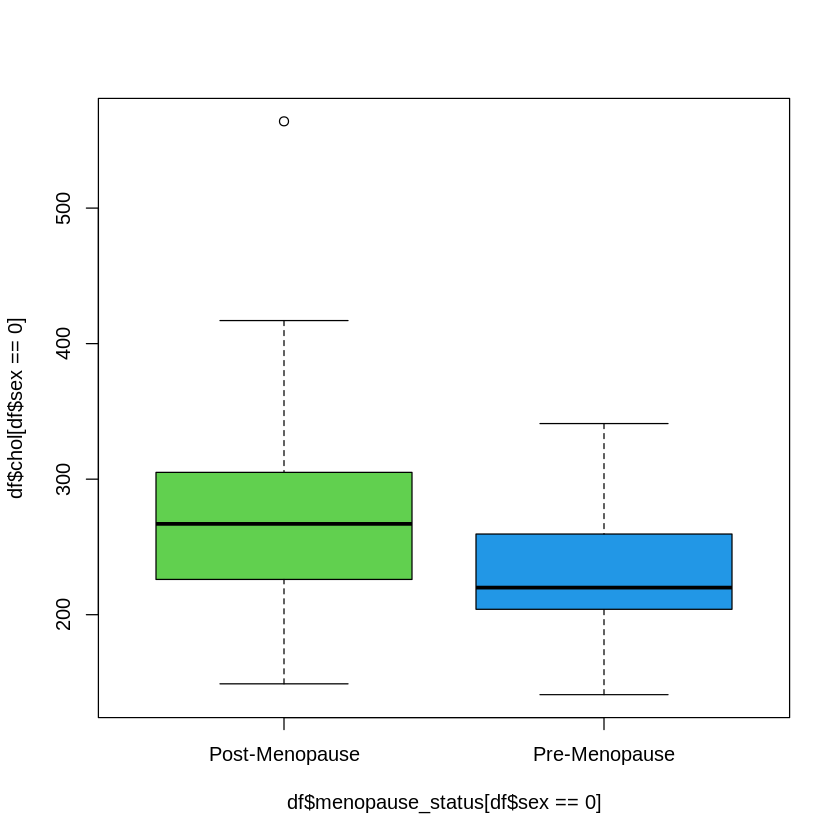

In [ ]:
# Create a new column to categorize women as pre/post-menopause
df$menopause_status = ifelse((df$sex == 0) & (df$age >= menopause_age), "Post-Menopause", "Pre-Menopause")

# Plot the boxplot
boxplot(df$chol[df$sex == 0] ~ df$menopause_status[df$sex == 0], col = c(3,4))

There seems to be quite a difference in the Serum Cholestrol level of woman pre and post menopause. Women seem to have a higher SCL post menopause.

And the difference seems to be pretty significant. So we'll use an independant sample t-test to test if there's truly a difference in the population means of the cholestrol levels of women and men before and after menopause.

In [ ]:
print(length(df$chol[(df$sex == 0) & (df$age >= menopause_age)]))
print(length(df$chol[(df$sex == 1) & (df$age >= menopause_age)]))

[1] 69
[1] 139


Since the number of woman and men above 51 is more than 30, we can assume that the central limit theorem has kicked in for the mean of he cholestrol levels of the groups.

Hence we'll be using the t-test for our study.

H_0: Woman have the same cholestrol levels before and after menopause.

H_1:  Woman don't have the same cholestrol levels before and after menopause.

In [ ]:
t.test(df$chol[(df$sex == 0) & (df$age >= menopause_age)],
       df$chol[(df$sex == 0) & (df$age < menopause_age)])


	Welch Two Sample t-test

data:  df$chol[(df$sex == 0) & (df$age >= menopause_age)] and df$chol[(df$sex == 0) & (df$age < menopause_age)]
t = 3.7489, df = 73.309, p-value = 0.000352
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 20.64097 67.49107
sample estimates:
mean of x mean of y 
 273.6957  229.6296 


If we assume that the mean cholestrol levels of woman after and before menopause is the same, then the likelihood of getting an observation of the means of the 2 groups at least as extreme as the one observed in the sample is 0.000352. Which is very low.


This suggests that we reject the null hypothesis and that woman after menopause have a greater SCL(due to the confidence interval) than before menopause.

Now we'll test to see if the sex difference in cholestrol levels persists before and/or after menopause.

So we can safely use the independant sample t-test for the means of the 2 groups.

H_0: Woman and men have the same average Serum cholestrol level after menopause in woman.

H_1: Woman and men have different average Serum cholestrol level after menopause in woman.

In [ ]:
t.test(df$chol[(df$sex == 1) & (df$age >= menopause_age)],
       df$chol[(df$sex == 0) & (df$age >= menopause_age)],
       paired = FALSE)


	Welch Two Sample t-test

data:  df$chol[(df$sex == 1) & (df$age >= menopause_age)] and df$chol[(df$sex == 0) & (df$age >= menopause_age)]
t = -3.4822, df = 95.468, p-value = 0.000752
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -48.98525 -13.41325
sample estimates:
mean of x mean of y 
 242.4964  273.6957 


We reject the null hypothesis, since the probability of gettting the mean values atleast as different as we got is very low(0.05) hence there's a difference in SCL of the 2 groups after menopause.

By the confidence intervals we can say that the woman on average have a greater cholestrol level than men after menopause.

Now testing for a difference before menopause

In [ ]:
print(length(df$chol[(df$sex == 0) & (df$age < menopause_age)]))
print(length(df$chol[(df$sex == 1) & (df$age < menopause_age)]))

[1] 27
[1] 68


The number of men under the median age of menopause in women is 68 which is greater than 30. So we can safely say that the central limit theorem has kicked in for the mean of the central limit theorem.

but this is not the case for women. We need to prove that the central limit theorem has started to take hold.

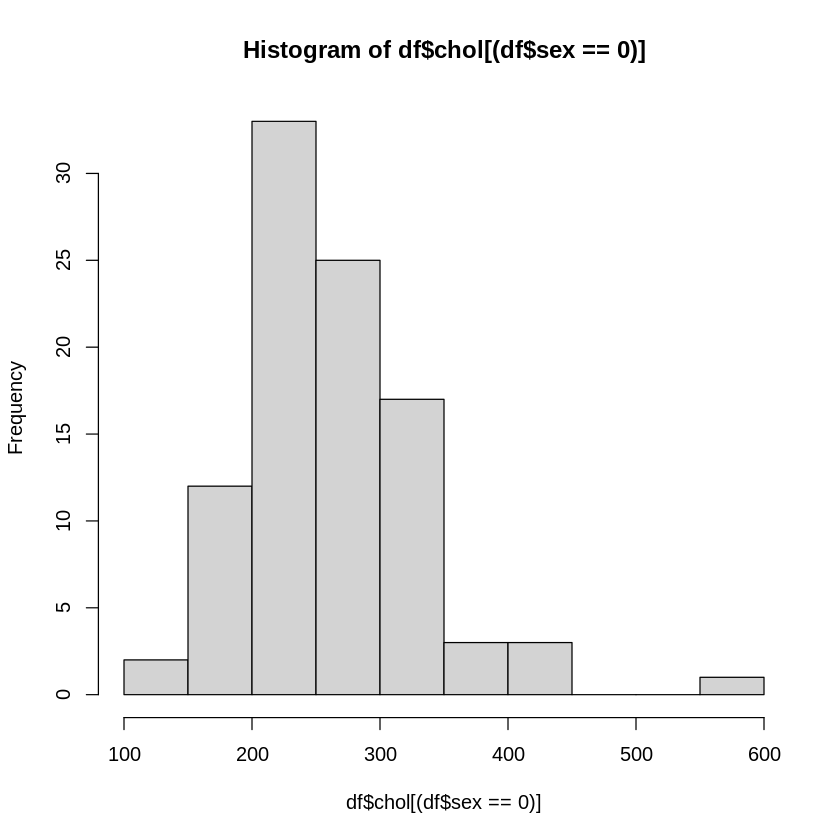

In [ ]:
hist(df$chol[(df$sex == 0)], breaks = 10)

We can see that the distribution is pretty normal to start off with. Consequently, it would be safe to assume that the means would assume a normal distribution at a much lower number than 30. We can assume that the entire dataset is a good estimate of the population since the data collection is randomized and there's a large amount of data values.

As a result we can safely assume that the mean cholestrol levels for women follows a normal distribution.

Hence we'll be using an independant sample t-test for means for our analysis.

H_0: Woman and men have the same average Serum cholestrol level before menopause in woman.

H_1: Woman and men have different average Serum cholestrol level before menopause in woman.

In [ ]:
t.test(df$chol[(df$sex == 1) & (df$age < menopause_age)],
       df$chol[(df$sex == 0) & (df$age < menopause_age)],
       paired = FALSE)


	Welch Two Sample t-test

data:  df$chol[(df$sex == 1) & (df$age < menopause_age)] and df$chol[(df$sex == 0) & (df$age < menopause_age)]
t = 0.31459, df = 46.427, p-value = 0.7545
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.76070  22.97203
sample estimates:
mean of x mean of y 
 232.7353  229.6296 


On assuming that the mean cholestrol levels for men and women before women is same, the probability of getting mean value of cholestrol for men and women at least as different we got is very high: 75.45%. Hence we fail to reject the assumption that woman and men have the same average Serum cholestrol level before menopause in woman.
